In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
train = pd.read_csv("train.csv")
#train.describe(include="all")
#train.shape
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
test = pd.read_csv("test.csv")
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [30]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df = pd.concat([train,test])
print("全データ数(行数,列数)は"+str(df.shape)+"です")

全データ数(行数,列数)は(1309, 12)です


In [32]:
df.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [33]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [34]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Fare'].fillna(df['Fare'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode(), inplace = True)
#df.drop(columns=["Cabin"], inplace=True)
df.isnull().sum()
#df.head()

Age               0
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [35]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [36]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [37]:
df.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [38]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Fare'].fillna(df['Fare'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df.drop(columns=["Cabin"], inplace=True)
df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [39]:
df["is_male"]=(df["Sex"]=="male").astype(int)
df.drop(columns=["Sex"],inplace=True)

emb={"S":0,"C":1,"Q":2}
df["Embarked"]=df["Embarked"].map(lambda x: emb[x])

In [40]:
df.drop(columns=["Ticket"],inplace=True)

In [41]:
df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [42]:
# 正規表現！
df["Title"]=df["Name"].str.extract('([a-zA-Z]+)\.', expand=True)
df["NameLength"]=df["Name"].map(lambda x: len(x))

In [43]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Lady          1
Capt          1
Countess      1
Sir           1
Mme           1
Jonkheer      1
Dona          1
Don           1
Name: Title, dtype: int64

In [44]:
def title_xfer(title):
    titles={"Mr":1,"Miss":2,"Mrs":3,"Master":4}
    if title in titles :
        return titles[title]
    else :
        return 0
    
df["Title"]=df["Title"].map(lambda x: title_xfer(x))
df.drop(columns=["Name"],inplace=True)

### lambdaについて
lmbda x:f(x)という書き方をして、xを引数としf(x)を戻り値とすることを実行する。

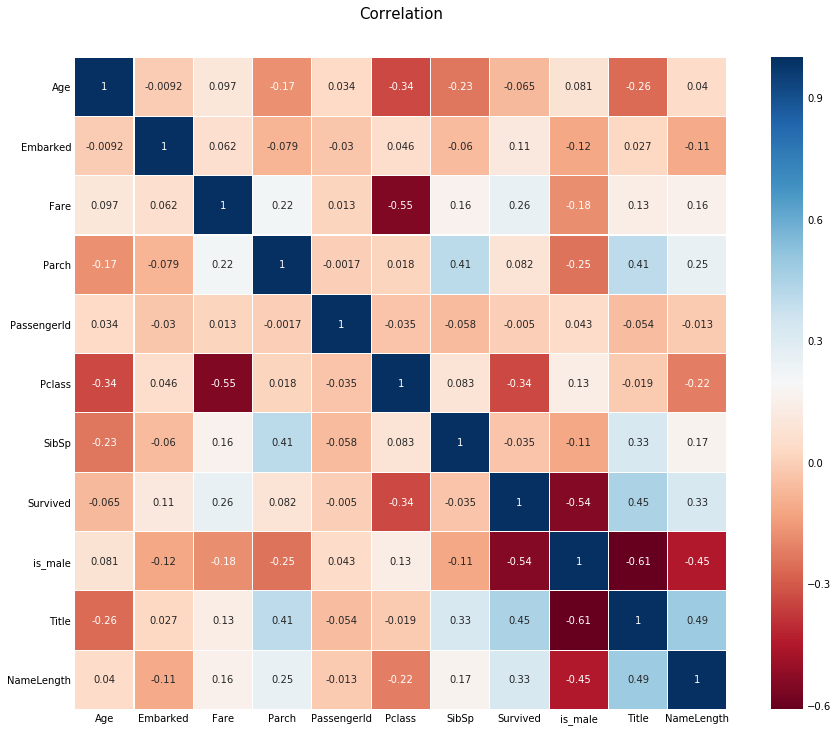

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation', y=1.05, size=15)
sns.heatmap(df[df["PassengerId"]<892].astype(float).corr(), linewidths=0.1,cmap=colormap, vmax=1.0, square=True, annot=True)

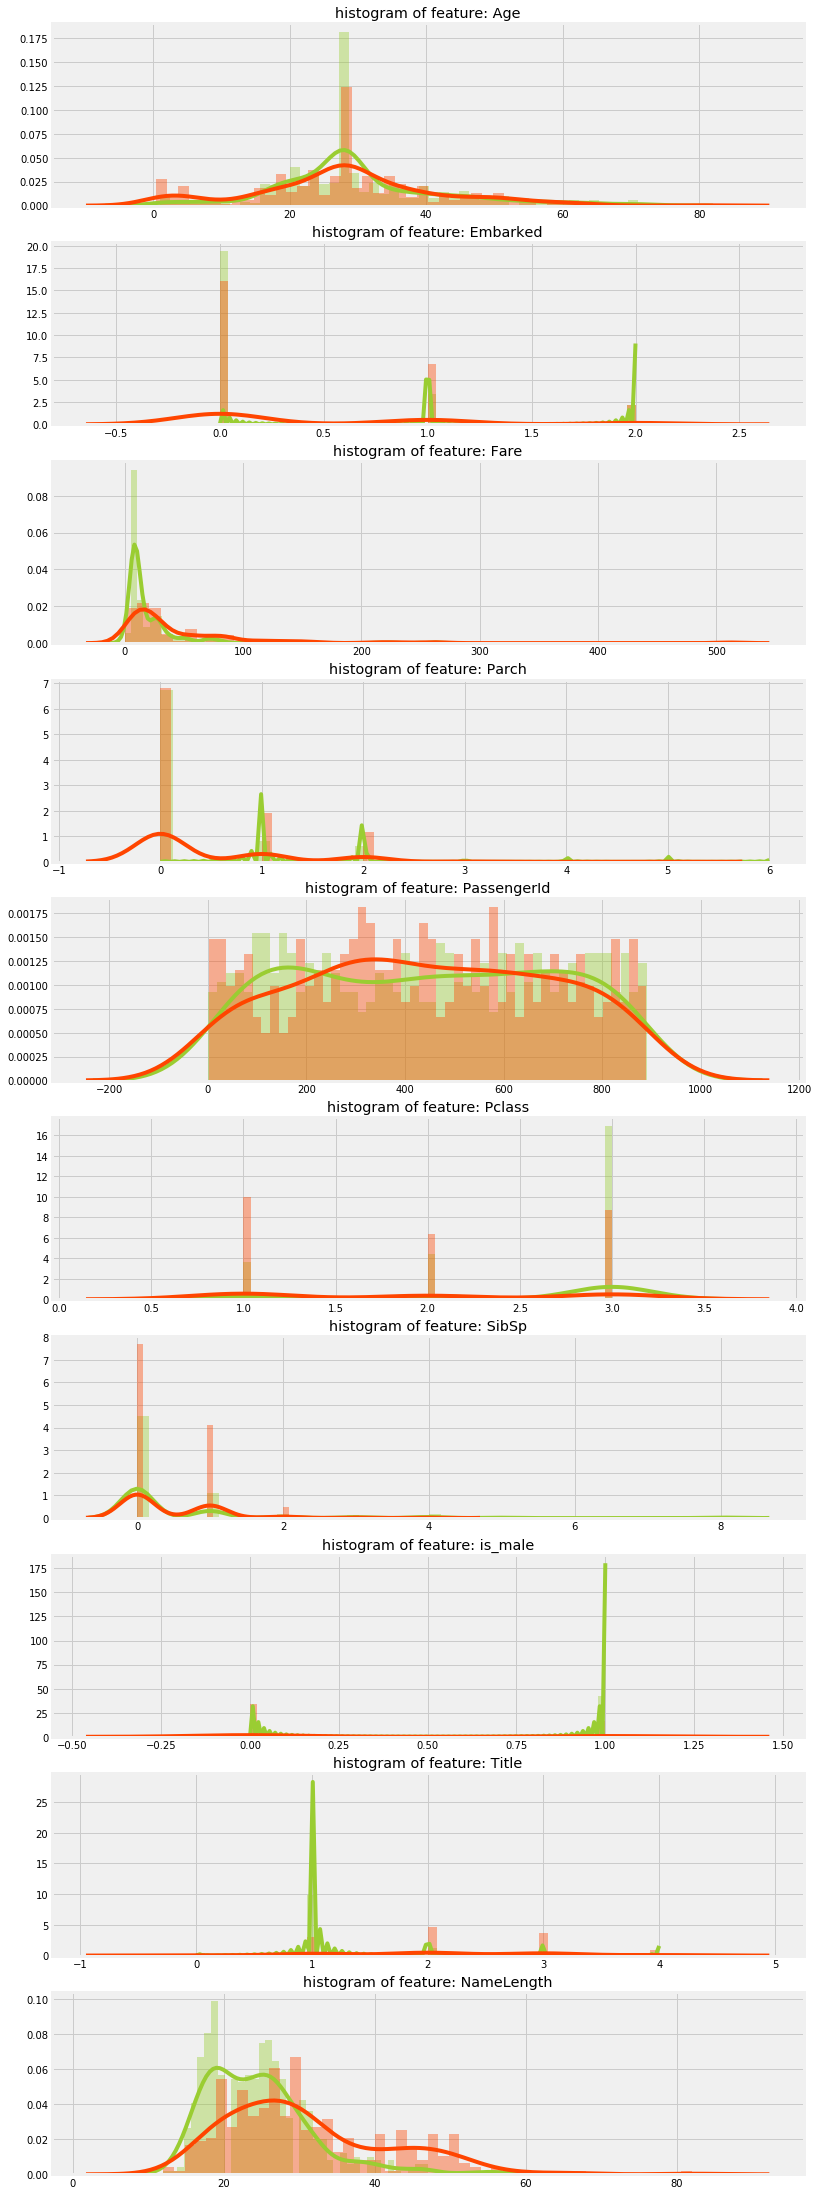

In [46]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df.drop(columns=["Survived"])):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df["Survived"]==0], bins=50, color="yellowgreen")
    sns.distplot(df[cn][df["Survived"]==1], bins=50, color="orangered")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [47]:
df.dtypes

Age            float64
Embarked         int64
Fare           float64
Parch            int64
PassengerId      int64
Pclass           int64
SibSp            int64
Survived       float64
is_male          int64
Title            int64
NameLength       int64
dtype: object

In [48]:
train = df[df["PassengerId"] < 892]
test = df[df["PassengerId"] >= 892].drop(columns="Survived")

### ランダムフォレストのインポート

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=100)

### ６００個を訓練用、３００個をテスト用データとする。

In [50]:
import numpy as np

train_X = np.array(train[train["PassengerId"]<=600].drop(columns=["Survived","PassengerId"]))
train_y = np.array(train[train["PassengerId"]<=600]["Survived"])

test_X = np.array(train[train["PassengerId"]>600].drop(columns=["Survived","PassengerId"]))
test_y = np.array(train[train["PassengerId"]>600]["Survived"])

train2_X = np.array(train[train["PassengerId"]<=600].drop(columns=["Survived","NameLength"]))
train2_y = np.array(train[train["PassengerId"]<=600]["Survived"])

test2_X = np.array(train[train["PassengerId"]>600].drop(columns=["Survived","NameLength"]))
test2_y = np.array(train[train["PassengerId"]>600]["Survived"])



In [51]:
print(train_X)

[[22.      0.      7.25   ...  1.      1.     23.    ]
 [38.      1.     71.2833 ...  0.      3.     51.    ]
 [26.      0.      7.925  ...  0.      2.     22.    ]
 ...
 [49.      0.      0.     ...  1.      1.     19.    ]
 [28.      1.      7.225  ...  1.      1.     17.    ]
 [49.      1.     56.9292 ...  1.      0.     44.    ]]


In [52]:
rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_y,test_y)

0.8281786941580757

In [54]:
rfc.fit(train2_X,train2_y)
pred2_y = rfc.predict(test2_X)

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(pred2_y,test2_y)
print(rfc.feature_importances_ )

[0.09893769 0.02435305 0.14516254 0.02297529 0.11347918 0.09431078
 0.04403095 0.15876139 0.17267929 0.12530984]


In [56]:
print(train_X.shape)

(600, 9)


### Xgboostのインストールと使用

In [57]:
from xgboost import XGBClassifier

xgc = XGBClassifier(n_estimators=1000, max_depth=10, random_state=100, eta=0.5).fit(train_X,train_y)

#xgc.fit(train_X,train_y)
pred_y = xgc.predict(test_X)

accuracy_score(pred_y,test_y)

0.7972508591065293

### 決定木のインストールと使用

In [58]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

### モデルの提出方法
- trainデータをモデルに学習させ、testデータの予測をKaggleに提出する

In [59]:
train_X = np.array(train.drop(columns=["Survived"]))
train_y = np.array(train["Survived"])

test_X = np.array(test)

In [60]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=100)

rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

In [61]:
ans = test.loc[:,["PassengerId"]]
ans["Survived"] = pd.Series(pred_y).astype(int)

In [62]:
ans.to_csv("submit.csv",index=None)

In [63]:
ans

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
